In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
# Importing Dataset
data = pd.read_csv(r'Downloads/Automobile_dataset.csv')
data

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


In [3]:
# Checking for dataset info
data.info()

# Checking for duplicated values
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

0

In [22]:
# Handling All Missing Values
data['price'] = data['price'].fillna(data['price'].median())
data['peak-rpm'] = data['peak-rpm'].fillna(data['peak-rpm'].median())
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].median())
data['stroke'] = data['stroke'].fillna(data['stroke'].median())
data['bore'] = data['bore'].fillna(data['bore'].median())
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].median())
data['normalized-losses']= data['normalized-losses'].fillna(data.groupby('body-style')['normalized-losses'].transform('median'))

# Converting number of door from float to integer
data['num-of-doors'] = data['num-of-doors'].astype(int)

#Confirming all processing done
data.isna().sum()
data.info()

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64

In [ ]:
#Exploratory Data Analysis

#Importing neccessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='price', ylabel='Count'>

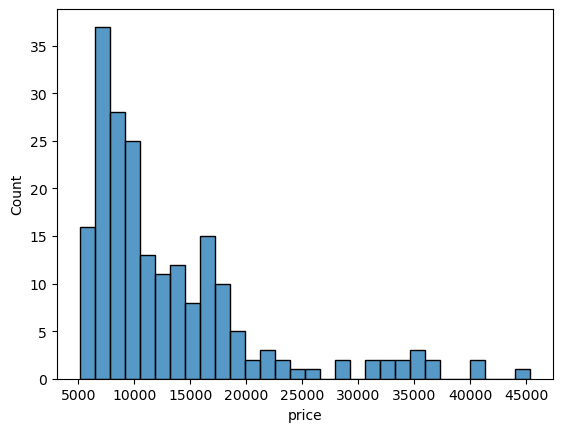

In [28]:
# Understanding the distribution of key variables

# Distribution of Price
plt.figure(figsize=(8,6))
sns.histplot(data['price'], bins = 30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# From the graph below, the distribution is rightly skewed meaning that most cars in the dataset are  budget to mid-range models, with a smaller number of luxury or high-end cars inflating the overall average

<Axes: xlabel='horsepower', ylabel='Count'>

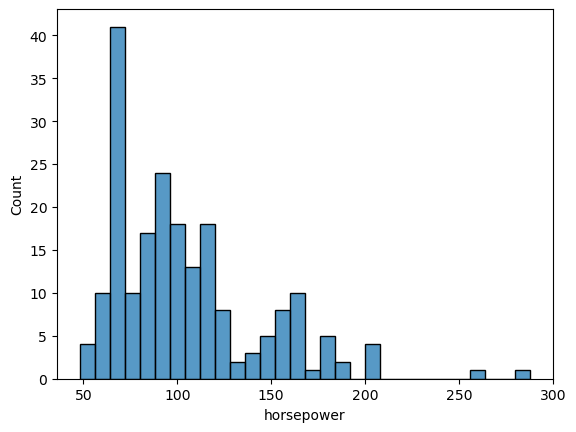

In [32]:
#Distribution of horsepower
plt.figure(figsize=(8,6))
sns.histplot(data['horsepower'], bins = 30)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.show()
# Horsepower is right-skewed, indicating that most cars are moderate in power, while a few high-performance vehicles stand out.

<Axes: xlabel='normalized-losses', ylabel='Count'>

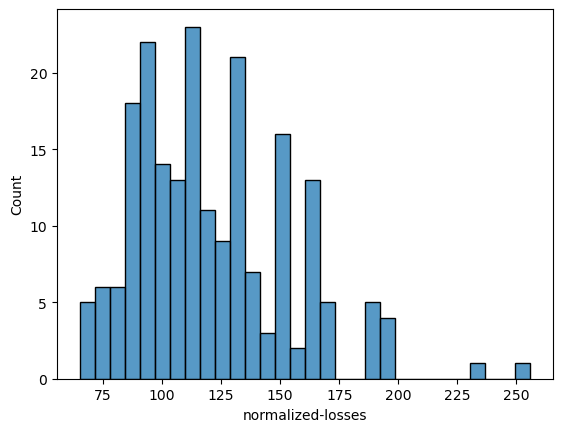

In [35]:
#Distribution of normalized-losses
plt.figure(figsize=(8,6))
sns.histplot(data['normalized-losses'], bins = 30)
plt.title('Distribution of Normalized Losses')
plt.xlabel('Normalized Losses')
plt.ylabel('Count')
plt.show()

# The normalized-losses column is right-skewed, with a small subset of vehicles linked to significantly higher insurance losses.

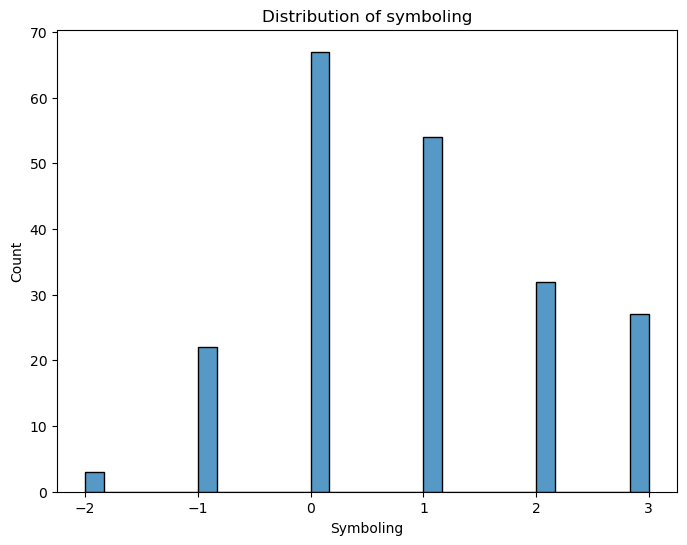

In [142]:
#Distribution of symboling
plt.figure(figsize=(8,6))
sns.histplot(data['symboling'], bins = 30)
plt.title('Distribution of Symboling')
plt.xlabel('Symboling')
plt.ylabel('Count')
plt.show()

# Symboling is mildly right-skewed, this means that while most vehicles are considered to have average or moderate insurance risk, there is a smaller but important group of vehicles perceived as higher risk.

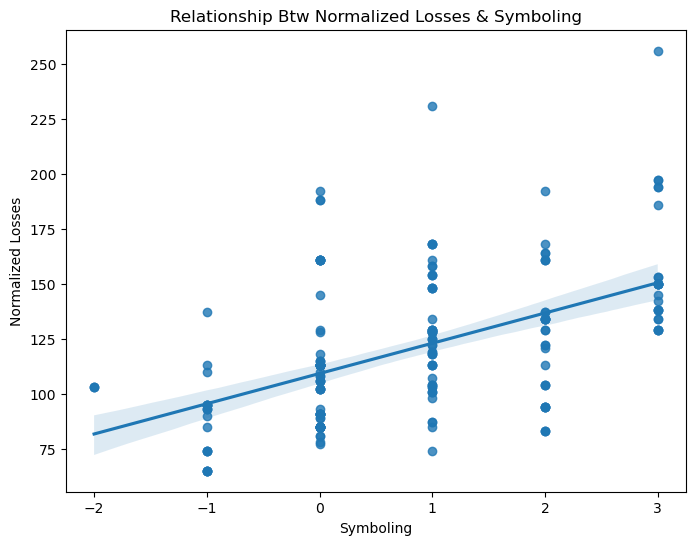

In [114]:
# Showing Relationship Btw Normalized Losses & Symboling
plt.figure(figsize=(8,6))
sns.regplot(x='symboling', y='normalized-losses', data=data)
plt.title('Relationship Btw Normalized Losses & Symboling')
plt.xlabel('Symboling')
plt.ylabel('Normalized Losses')
plt.show()

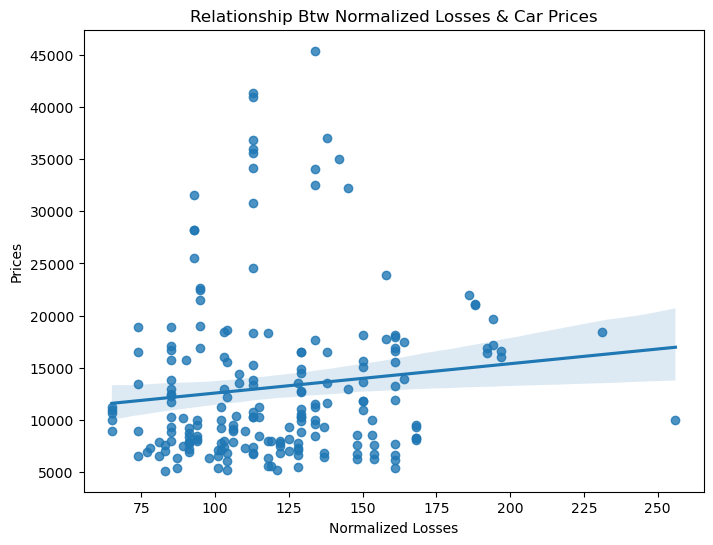

In [116]:
# Showing Relationship Btw Normalized Losses & Car Prices
plt.figure(figsize=(8,6))
sns.regplot(x='normalized-losses', y='price', data=data)
plt.title('Relationship Btw Normalized Losses & Car Prices')
plt.xlabel('Normalized Losses')
plt.ylabel('Prices')
plt.show()

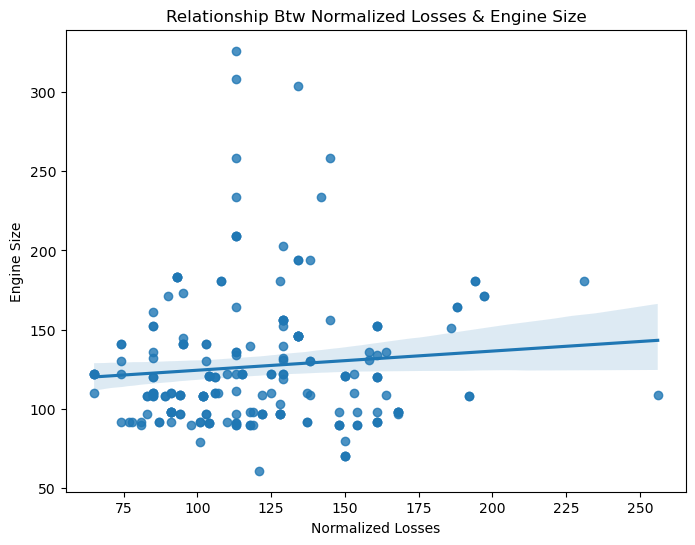

In [136]:
# Showing Relationship Btw Normalized Losses & Engine Size
plt.figure(figsize=(8,6))
sns.regplot(x='normalized-losses', y='engine-size', data=data)
plt.title('Relationship Btw Normalized Losses & Engine Size')
plt.xlabel('Normalized Losses')
plt.ylabel('Engine Size')
plt.show()

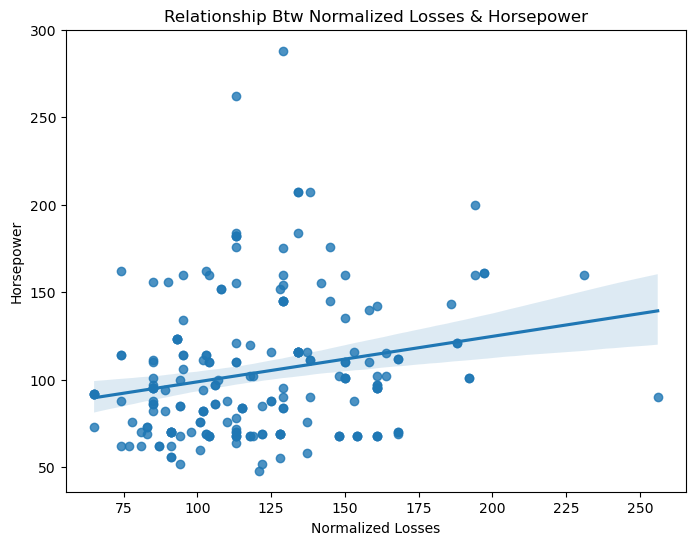

In [122]:
#Showing Relationship Btw Normalized Losses & Horsepower
plt.figure(figsize=(8,6))
sns.regplot(x='normalized-losses', y='horsepower', data=data)
plt.title('Relationship Btw Normalized Losses & Horsepower')
plt.xlabel('Normalized Losses')
plt.ylabel('Horsepower')
plt.show()

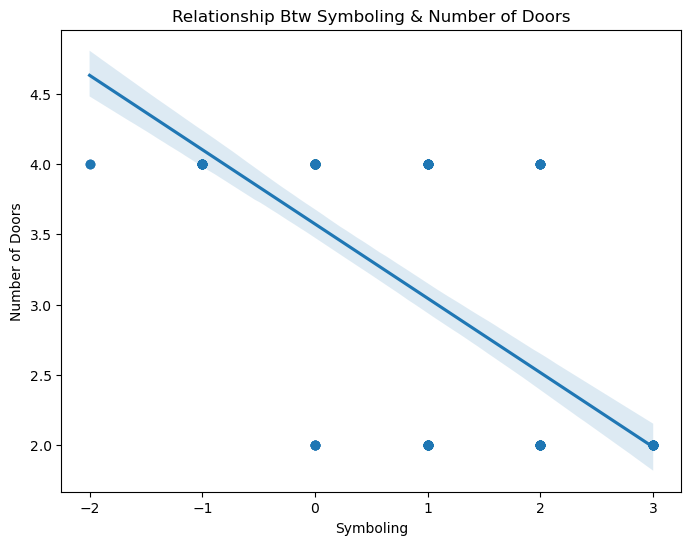

In [138]:
# Showing Relationship Btw Symboling & Number of Doors
plt.figure(figsize=(8,6))
sns.regplot(x='symboling', y='num-of-doors', data=data)
plt.title('Relationship Btw Symboling & Number of Doors')
plt.xlabel('Symboling')
plt.ylabel('Number of Doors')
plt.show()

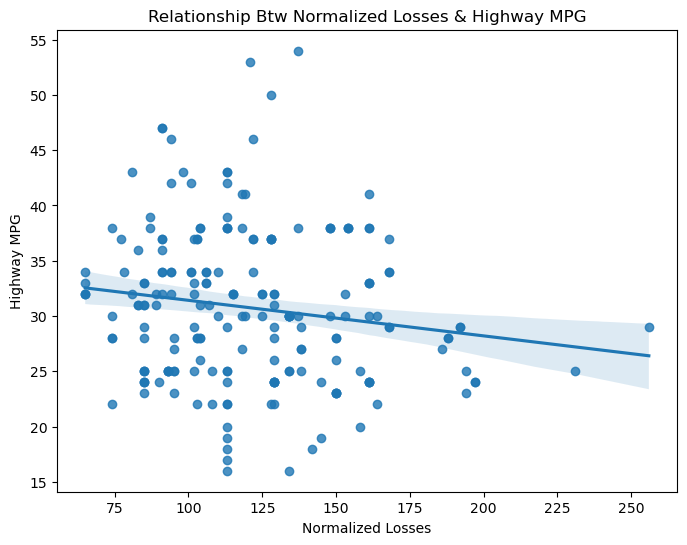

In [134]:
# Showing Relationship Btw Normalized Losses & Highway MPG
plt.figure(figsize=(8,6))
sns.regplot(x='normalized-losses', y='highway-mpg', data=data)
plt.title('Relationship Btw Normalized Losses & Highway MPG')
plt.xlabel('Normalized Losses')
plt.ylabel('Highway MPG')
plt.show()


In [85]:
#Grouped Insights By Make
avg_symboling_make = data.groupby('make')['symboling'].mean().round(2).sort_values(ascending = False)
avg_symboling_make 

# Porsche, saab and alfa-romero have the highest symboling 2.60, 2.50, 2.33 respectively, volvo being the lowest with -1.272727 

make
porsche          2.60
saab             2.50
alfa-romero      2.33
mitsubishi       1.85
volkswagen       1.67
audi             1.29
mazda            1.12
dodge            1.00
mercury          1.00
nissan           1.00
plymouth         1.00
chevrolet        1.00
renault          1.00
isuzu            0.75
honda            0.62
toyota           0.56
subaru           0.50
bmw              0.38
peugot           0.00
mercedes-benz    0.00
jaguar           0.00
volvo           -1.27
Name: symboling, dtype: float64

In [87]:
#Grouped Insights By Body Style
avg_symboling_body = data.groupby('body-style')['symboling'].mean().round(2).sort_values(ascending = False)
avg_symboling_body 

# convertible has highest symboling with 2.83 and wagon the lowest with -0.16

body-style
convertible    2.83
hardtop        1.88
hatchback      1.59
sedan          0.33
wagon         -0.16
Name: symboling, dtype: float64